# inisialisasi

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
# from sklearn.decomposition import PCA as sklearnPCA
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from scipy.stats import zscore

# from sklearn.decomposition import PCA as sklearnPCA
# from sklearn.preprocessing import StandardScaler

# from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.model_selection import KFold

from sklearn.neural_network import MLPClassifier

In [0]:
# url = 'https://raw.githubusercontent.com/hasobi/skripsi/dev/dataset/gabungan_train_test-original.csv'
# url = ''
# dataframe = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/SIAP SIDANG/KDDTrain_Test.csv')
dataframe =  pd.read_csv('https://raw.githubusercontent.com/hasobi/dos-classification/master/dataset/KDDTrain_Test.csv')
# data = pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/SIAP SIDANG/KDDTrain_Test.csv')
data = pd.read_csv('https://raw.githubusercontent.com/hasobi/dos-classification/master/dataset/KDDTrain_Test.csv')

In [0]:
# dicitionary untuk merubah tipe serangan menjadi lebih umum seperti Normal, DoS, Probe, U2R, dan R2L

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

protocol_dict ={
    "udp" : 0,
    "tcp" : 1,
    "icmp": 2
}

service_dict={
    "Z39_50" : 0,
    "X11" : 1,
    "whois" : 2,
    "vmnet" : 3,
    "uucp_path" : 4,
    "uucp" : 5,
    "urp_i" : 6,
    "urh_i" : 7,
    "time" : 8,
    "tim_i" : 9,
    "tftp_u" : 10,
    "telnet" : 11,
    "systat" : 12,
    "supdup" : 13,
    "sunrpc" : 14,
    "ssh" : 15,
    "sql_net" : 16,
    "smtp" : 17,
    "shell" : 18,
    "rje" : 19,
    "remote_job" : 20,
    "red_i" : 21,
    "private" : 22,
    "printer" : 23,
    "pop_3" : 24,
    "pop_2" : 25,
    "pm_dump" : 26,
    "other" : 27,
    "ntp_u" : 28,
    "nntp" : 29,
    "nnsp" : 30,
    "netstat" : 31,
    "netbios_ssn" : 32,
    "netbios_ns" : 33,
    "netbios_dgm" : 34,
    "name" : 35,
    "mtp" : 36,
    "login" : 37,
    "link" : 38,
    "ldap" : 39,
    "kshell" : 40,
    "klogin" : 41,
    "iso_tsap" : 42,
    "IRC" : 43,
    "imap4" : 44,
    "http_8001" : 45,
    "http_443" : 46,
    "http_2784" : 47,
    "http" : 48,
    "hostnames" : 49,
    "harvest" : 50,
    "gopher" : 51,
    "ftp_data" : 52,
    "ftp" : 53,
    "finger" :  54,
    "exec" : 55,
    "efs" : 56,
    "ecr_i" : 57,
    "eco_i" : 58,
    "echo" : 59,
    "domain_u" : 60,
    "domain" : 61,
    "discard" : 62,
    "daytime" : 63,
    "ctf" : 64,
    "csnet_ns" : 65,
    "courier" : 66,
    "bgp" : 67,
    "auth" : 68,
    "aol" : 69

}

flag_dict={
    "SH" : 0,
    "SF" : 1,
    "S3" : 2,
    "S2" : 3,
    "S1" : 4,
    "S0" : 5,
    "RSTR" : 6,
    "RSTOS0" : 7,
    "RSTO" : 8,
    "REJ" : 9,
    "OTH" : 10

}
data.replace(flag_dict, inplace = True)
data.replace(service_dict, inplace = True)
data.replace(protocol_dict, inplace = True)
data.replace(attack_dict, inplace = True)

In [5]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [6]:
data.shape

(148516, 43)

In [0]:
# url = 'https://raw.githubusercontent.com/hasobi/skripsi/dev/dataset/KDDTrain_Test.csv'
# dataframe1 = pd.read_csv(url)

In [0]:
# dataframe1

# PCAv2 - 41 fitur

In [9]:
data.type_attack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [0]:
data_all1 = data.drop(columns=['num_packet','type_attack'])

In [11]:
data_all1.shape

(148516, 41)

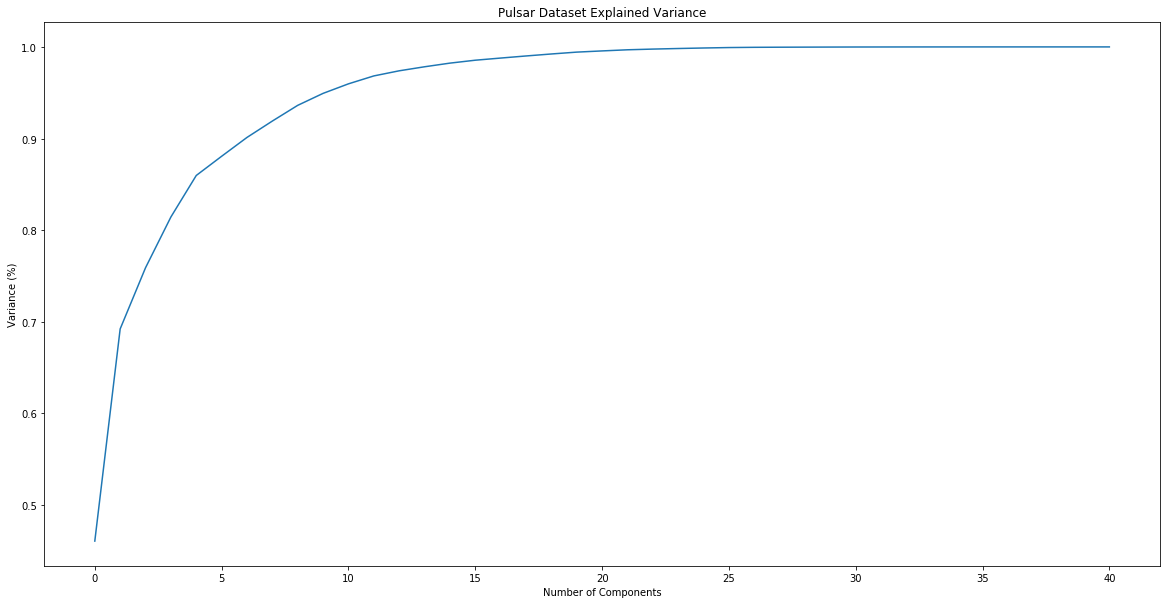

In [12]:
## MULAI PCA

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data_all1.iloc[:,:])

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
# plt.figure()
plt.figure(figsize=(20,10)) 

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [0]:
pca = PCA(n_components=41)
dataset = pca.fit_transform(data_rescaled)

In [14]:
dataset.shape

(148516, 41)

In [15]:
df3v1=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df3v1.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,-0.032376,0.006620,0.081705,-0.051989,-0.001722,-0.003106,-0.015040,-0.018264,-0.001643,-0.000989,-0.000149,-0.006964,-0.004533,-0.000210,-0.000157,-5.451047e-07,-0.000445,0.000052,-0.000139,-4.760363e-05,0.000003,-0.000011,-9.558075e-18
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,-0.014189,0.026604,-0.183462,0.084000,0.043852,-0.001883,0.038448,-0.001640,0.005272,0.002423,0.003426,0.001434,0.002474,-0.000742,-0.000084,-4.248704e-04,0.000462,0.000704,0.000158,-4.170726e-05,0.000036,-0.000007,1.162525e-17
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,0.009050,0.000282,-0.049915,0.021489,0.005059,0.000722,0.001802,0.003486,0.001287,-0.000146,-0.000418,-0.000488,-0.000203,0.000069,-0.000072,5.659334e-06,0.000053,-0.000078,0.000012,-3.587490e-07,0.000009,0.000003,4.430353e-17
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,-0.013705,0.011873,-0.003863,-0.003856,-0.072162,-0.012212,0.017498,-0.007879,0.012113,0.000448,-0.000886,0.000483,-0.000328,0.000054,0.000162,-4.609370e-06,0.000486,0.000420,-0.000098,-6.105354e-05,-0.000010,-0.000002,-5.469062e-17
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,-0.002939,-0.002169,-0.002592,0.004965,0.010204,-0.001057,0.001141,0.003586,-0.002123,0.000204,0.000300,0.000462,-0.000583,-0.000145,-0.000953,2.989296e-05,-0.000055,-0.000002,0.000041,8.627449e-05,-0.000002,0.000007,-5.792824e-19


In [16]:
df3v1.shape

(148516, 41)

In [17]:
data_attack = data['type_attack']
data_attack.shape

(148516,)

In [18]:
data_all2 = pd.concat([df3v1, data_attack], axis=1)
data_all2.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,-0.032376,0.006620,0.081705,-0.051989,-0.001722,-0.003106,-0.015040,-0.018264,-0.001643,-0.000989,-0.000149,-0.006964,-0.004533,-0.000210,-0.000157,-5.451047e-07,-0.000445,0.000052,-0.000139,-4.760363e-05,0.000003,-0.000011,-9.558075e-18,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,-0.014189,0.026604,-0.183462,0.084000,0.043852,-0.001883,0.038448,-0.001640,0.005272,0.002423,0.003426,0.001434,0.002474,-0.000742,-0.000084,-4.248704e-04,0.000462,0.000704,0.000158,-4.170726e-05,0.000036,-0.000007,1.162525e-17,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,0.009050,0.000282,-0.049915,0.021489,0.005059,0.000722,0.001802,0.003486,0.001287,-0.000146,-0.000418,-0.000488,-0.000203,0.000069,-0.000072,5.659334e-06,0.000053,-0.000078,0.000012,-3.587490e-07,0.000009,0.000003,4.430353e-17,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,-0.013705,0.011873,-0.003863,-0.003856,-0.072162,-0.012212,0.017498,-0.007879,0.012113,0.000448,-0.000886,0.000483,-0.000328,0.000054,0.000162,-4.609370e-06,0.000486,0.000420,-0.000098,-6.105354e-05,-0.000010,-0.000002,-5.469062e-17,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,-0.002939,-0.002169,-0.002592,0.004965,0.010204,-0.001057,0.001141,0.003586,-0.002123,0.000204,0.000300,0.000462,-0.000583,-0.000145,-0.000953,2.989296e-05,-0.000055,-0.000002,0.000041,8.627449e-05,-0.000002,0.000007,-5.792824e-19,normal


In [19]:
data_all2.type_attack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [0]:
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

In [21]:
data_normaldos

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,column 18,column 19,column 20,column 21,column 22,column 23,column 24,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34,column 35,column 36,column 37,column 38,column 39,column 40,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,-0.032376,0.006620,0.081705,-0.051989,-0.001722,-0.003106,-0.015040,-0.018264,-0.001643,-0.000989,-0.000149,-0.006964,-0.004533,-0.000210,-0.000157,-5.451047e-07,-0.000445,0.000052,-0.000139,-4.760363e-05,0.000003,-0.000011,-9.558075e-18,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,-0.014189,0.026604,-0.183462,0.084000,0.043852,-0.001883,0.038448,-0.001640,0.005272,0.002423,0.003426,0.001434,0.002474,-0.000742,-0.000084,-4.248704e-04,0.000462,0.000704,0.000158,-4.170726e-05,0.000036,-0.000007,1.162525e-17,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,0.009050,0.000282,-0.049915,0.021489,0.005059,0.000722,0.001802,0.003486,0.001287,-0.000146,-0.000418,-0.000488,-0.000203,0.000069,-0.000072,5.659334e-06,0.000053,-0.000078,0.000012,-3.587490e-07,0.000009,0.000003,4.430353e-17,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,-0.013705,0.011873,-0.003863,-0.003856,-0.072162,-0.012212,0.017498,-0.007879,0.012113,0.000448,-0.000886,0.000483,-0.000328,0.000054,0.000162,-4.609370e-06,0.000486,0.000420,-0.000098,-6.105354e-05,-0.000010,-0.000002,-5.469062e-17,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,-0.002939,-0.002169,-0.002592,0.004965,0.010204,-0.001057,0.001141,0.003586,-0.002123,0.000204,0.000300,0.000462,-0.000583,-0.000145,-0.000953,2.989296e-05,-0.000055,-0.000002,0.000041,8.627449e-05,-0.000002,0.000007,-5.792824e-19,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,-0.408084,0.096112,0.518219,-0.422750,0.203252,0.078130,-0.336635,0.288477,0.142605,-0.110936,0.124525,-0.009756,-0.025701,-0.099058,-0.118726,-0.072920,0.063698,-0.036403,0.031837,0.006437,0.008970,-0.018430,-0.002888,0.001997,0.000816,-0.007001,-0.003137,0.000367,-0.000045,4.486348e-04,0.000576,0.000849,0.000225,1.465744e-04,-0.000046,-0.000002,-2.871573e-20,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140440,-0.092445,0.016003,0.132751,-0.274037,0.017808,0.076274,-0.019840,0.029050,-0.046854,-0.007740,0.002475,-0.028750,-0.003083,0.004940,-0.004040,-0.006299,0.005721,-0.010642,-0.000314,0.000212,-0.000513,-0.000696,-0.000264,-0.002796,-0.003126,-0.000364,-0.000913,-2.476098e-04,-0.000432,-0.000363,-0.000053,-7.250437e-05,0.000015,0.000005,-9.667916e-20,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,0.058345,-0.062198,0.027576,0.074528,-0.027545,0.004143,0.027366,-0.000850,-0.024062,-0.017013,-0.002245,-0.000539,-0.006954,-0.009786,-0.005166,0.004367,0.005394,-0.001198,0.003874,0.004011,-0.000313,0.000200,0.000334,0.000344,-0.000387,-0.000128,-0.000864,2.449742e-05,0.000001,-0.000018,0.000019,6.562754e-05,0.000001,0.000005,-5.535031e-19,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231617,0.079806,-0.155350,0.040089,0.106986,-0.0385

In [0]:
X = data_normaldos.loc[:, :'column 40']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [24]:
print(f"training time : {stop - start}s")

training time : 30.994487285614014s


In [25]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.998262291730553

In [0]:
clf = MLPClassifier(random_state = 5, max_iter=300)

scoring = {'accuracy': make_scorer(accuracy_score)}

In [0]:
# start = time.time()

# cv = ShuffleSplit(n_splits=3, test_size=0.3,train_size = 0.7, random_state=5)
# scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

# stop = time.time()

In [0]:
# print(f"Cross Validation time : {stop - start}s")

In [0]:
# print(scores)

# PCA 18

In [30]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,1,52,1,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20,normal
1,0,0,27,1,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,normal
2,0,1,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,dos
3,0,1,48,1,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,normal
4,0,1,48,1,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,normal


In [31]:
data.type_attack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [0]:
data_all1 = data.drop(columns=['num_packet','type_attack'])

In [33]:
pca = PCA(n_components=18)
dataset = pca.fit_transform(data_rescaled)

df18=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df18.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715


In [34]:
df18.shape

(148516, 18)

In [35]:
data_all2 = pd.concat([df18, data_attack], axis=1)
data_all2.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,normal


In [36]:
data_all2.type_attack.unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [37]:
data_normaldos3 = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos3

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13,column 14,column 15,column 16,column 17,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,-0.134752,-0.017798,0.076811,-0.002909,-0.089396,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136762,-0.166930,0.005222,-0.232558,0.092964,-0.091796,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,0.002643,0.023151,-0.013676,-0.007915,-0.002653,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037350,-0.063787,0.047175,0.056267,0.133808,-0.015194,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017770,0.016677,0.040106,-0.049254,-0.015651,0.009156,0.005715,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,-0.408084,0.096112,0.518219,-0.422750,0.203252,0.078130,-0.336635,0.288477,0.142605,-0.110936,0.124525,-0.009756,-0.025701,-0.099058,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140440,-0.092445,0.016003,0.132751,-0.274037,0.017808,0.076274,-0.019840,0.029050,-0.046854,-0.007740,0.002475,-0.028750,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,0.058345,-0.062198,0.027576,0.074528,-0.027545,0.004143,0.027366,-0.000850,-0.024062,-0.017013,-0.002245,-0.000539,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231617,0.079806,-0.155350,0.040089,0.106986,-0.038570,-0.008078,0.062296,0.051919,-0.035847,0.015813,0.006642,-0.001734,dos


In [0]:
X = data_normaldos3.loc[:, :'column 17']
y = data_normaldos3.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [40]:
print(f"training time : {stop - start}s")

training time : 60.840070486068726s


In [41]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.996524583461106

# 1 fitur

In [42]:
pca = PCA(n_components=1)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0
0,-0.210454
1,0.295173
2,1.730388
3,-1.010287
4,-0.999356


In [43]:
df

,column 0
0,-0.210454
1,0.295173
2,1.730388
3,-1.010287
4,-0.999356
...,...
148511,-0.828475
148512,-1.049307
148513,-1.005687
148514,-0.721211


In [44]:
df.shape

(148516, 1)

In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)

In [0]:
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

In [47]:
data_normaldos

,column 0,type_attack
0,-0.210454,normal
1,0.295173,normal
2,1.730388,dos
3,-1.010287,normal
4,-0.999356,normal
...,...,...
148510,-0.745114,dos
148511,-0.828475,normal
148512,-1.049307,normal
148513,-1.005687,dos


In [0]:
X = data_normaldos.loc[:, :'column 0']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [50]:
print(f"training time : {stop - start}s")

training time : 54.555410385131836s


In [51]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.9432689359092303

# 2

In [52]:
pca = PCA(n_components=2)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1
0,-0.210454,0.109517
1,0.295173,0.354357
2,1.730388,-0.587896
3,-1.010287,-0.469081
4,-0.999356,-0.337932


In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)

In [54]:
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos

,column 0,column 1,type_attack
0,-0.210454,0.109517,normal
1,0.295173,0.354357,normal
2,1.730388,-0.587896,dos
3,-1.010287,-0.469081,normal
4,-0.999356,-0.337932,normal
...,...,...,...
148510,-0.745114,-0.121176,dos
148511,-0.828475,-0.226192,normal
148512,-1.049307,-0.351544,normal
148513,-1.005687,-0.286393,dos


In [0]:
X = data_normaldos.loc[:, :'column 1']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [56]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [57]:
print(f"training time : {stop - start}s")

training time : 125.06620287895203s


In [58]:
pred = clf.predict(X_test)

accuracy_score(y_test,pred)

0.9541040580598998

# 3

In [59]:
pca = PCA(n_components=3)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2
0,-0.210454,0.109517,0.558613
1,0.295173,0.354357,0.747835
2,1.730388,-0.587896,-0.089366
3,-1.010287,-0.469081,-0.215443
4,-0.999356,-0.337932,-0.496051


In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)

In [61]:
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos

,column 0,column 1,column 2,type_attack
0,-0.210454,0.109517,0.558613,normal
1,0.295173,0.354357,0.747835,normal
2,1.730388,-0.587896,-0.089366,dos
3,-1.010287,-0.469081,-0.215443,normal
4,-0.999356,-0.337932,-0.496051,normal
...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,dos
148511,-0.828475,-0.226192,-0.170238,normal
148512,-1.049307,-0.351544,-0.396084,normal
148513,-1.005687,-0.286393,-0.491145,dos


In [0]:
X = data_normaldos.loc[:, :'column 2']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [63]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [64]:
print(f"training time : {stop - start}s")

training time : 100.47803163528442s


In [65]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9706122866196464

# 4

In [66]:
pca = PCA(n_components=4)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3
0,-0.210454,0.109517,0.558613,-0.210847
1,0.295173,0.354357,0.747835,-0.551986
2,1.730388,-0.587896,-0.089366,0.074590
3,-1.010287,-0.469081,-0.215443,0.414567
4,-0.999356,-0.337932,-0.496051,-0.226706


In [67]:
data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos

,column 0,column 1,column 2,column 3,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,normal
1,0.295173,0.354357,0.747835,-0.551986,normal
2,1.730388,-0.587896,-0.089366,0.074590,dos
3,-1.010287,-0.469081,-0.215443,0.414567,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,normal
...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,dos


In [0]:
X = data_normaldos.loc[:, :'column 3']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [69]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [70]:
print(f"training time : {stop - start}s")

training time : 125.31980395317078s


In [71]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9851017070428294

# 5 fitur

In [72]:
pca = PCA(n_components=5)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4
0,-0.210454,0.109517,0.558613,-0.210847,0.410863
1,0.295173,0.354357,0.747835,-0.551985,0.892919
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202225
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366


In [73]:
data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos

,column 0,column 1,column 2,column 3,column 4,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,normal
1,0.295173,0.354357,0.747835,-0.551985,0.892919,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202225,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,normal
...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,-0.408084,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,dos


In [0]:
X = data_normaldos.loc[:, :'column 4']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [76]:
print(f"training time : {stop - start}s")

training time : 109.945152759552s


In [77]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9874016150465093

# 6 Fitur

In [78]:
pca = PCA(n_components=6)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5
0,-0.210454,0.109517,0.558613,-0.210848,0.410862,-0.182513
1,0.295173,0.354357,0.747835,-0.551986,0.892920,-0.064735
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029832
3,-1.010287,-0.469081,-0.215443,0.414568,-0.202226,-0.275658
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139345


In [79]:
data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]
data_normaldos

,column 0,column 1,column 2,column 3,column 4,column 5,type_attack
0,-0.210454,0.109517,0.558613,-0.210848,0.410862,-0.182513,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892920,-0.064735,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029832,dos
3,-1.010287,-0.469081,-0.215443,0.414568,-0.202226,-0.275658,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139345,normal
...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638119,-0.628707,-0.408084,0.096152,dos
148511,-0.828475,-0.226192,-0.170238,0.320093,0.390840,-0.140434,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231616,dos


In [0]:
X = data_normaldos.loc[:, :'column 5']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [81]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [82]:
print(f"training time : {stop - start}s")

training time : 119.22019481658936s


In [83]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9891904323827047

# 7 fitur

In [84]:
pca = PCA(n_components=7)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

,column 0,column 1,column 2,column 3,column 4,column 5,column 6
0,-0.210454,0.109517,0.558613,-0.210847,0.410862,-0.182549,-0.269972
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064746,0.035070
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051779
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275667,0.018497
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131674


In [0]:
data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 6']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [87]:
print(f"training time : {stop - start}s")

training time : 115.80921959877014s


In [88]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9920780946539917

# 8 fitur

In [0]:
pca = PCA(n_components=8)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 7']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [91]:
print(f"training time : {stop - start}s")

training time : 76.98422122001648s


In [92]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9918481038536237

In [93]:
data_normaldos

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182547,-0.269977,-0.061004,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064744,0.035079,0.275920,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014233,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275668,0.018478,0.132573,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,normal
...,...,...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,-0.408084,0.096112,0.518220,-0.422747,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140441,-0.092446,0.016003,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,0.058346,-0.062198,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231619,0.079807,-0.155350,dos


# 9 Fitur

In [0]:
pca = PCA(n_components=9)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 8']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [96]:
print(f"training time : {stop - start}s")

training time : 79.96375608444214s


In [97]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9932024941224573

# 10 Fitur

In [0]:
pca = PCA(n_components=10)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 9']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [100]:
print(f"training time : {stop - start}s")

training time : 74.9572377204895s


In [101]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9941735663906777

# 11 Fitur

In [0]:
pca = PCA(n_components=11)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 10']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [104]:
print(f"training time : {stop - start}s")

training time : 63.35535216331482s


In [105]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.994556884391291

# 12 Fitur

In [0]:
pca = PCA(n_components=12)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 11']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [108]:
print(f"training time : {stop - start}s")

training time : 83.08892273902893s


In [109]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9949402023919043

# 13 Fitur

In [0]:
pca = PCA(n_components=13)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 12']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [111]:
data_normaldos

,column 0,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,type_attack
0,-0.210454,0.109517,0.558613,-0.210847,0.410863,-0.182544,-0.269973,-0.061005,-0.463782,-0.041845,-0.016257,0.219600,0.057659,normal
1,0.295173,0.354357,0.747835,-0.551986,0.892921,-0.064741,0.035088,0.275928,0.288845,0.207347,-0.411123,-0.394146,0.136759,normal
2,1.730388,-0.587896,-0.089366,0.074590,-0.067424,0.029835,-0.051773,-0.014232,0.111595,-0.045301,-0.100270,0.022367,0.014328,dos
3,-1.010287,-0.469081,-0.215443,0.414567,-0.202224,-0.275664,0.018488,0.132578,0.049882,0.011953,0.045059,0.015433,0.037353,normal
4,-0.999356,-0.337932,-0.496051,-0.226706,0.023366,0.139347,0.131672,-0.138722,0.036212,0.066413,-0.031553,0.017769,0.016677,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,-0.745114,-0.121176,0.638118,-0.628706,-0.408084,0.096112,0.518219,-0.422750,0.203252,0.078130,-0.336635,0.288476,0.142603,dos
148511,-0.828475,-0.226192,-0.170238,0.320094,0.390840,-0.140440,-0.092445,0.016003,0.132751,-0.274038,0.017808,0.076274,-0.019840,normal
148512,-1.049307,-0.351544,-0.396084,-0.037051,-0.019923,0.134743,0.058345,-0.062198,0.027576,0.074528,-0.027545,0.004143,0.027366,normal
148513,-1.005687,-0.286393,-0.491145,-0.172798,0.005716,0.231617,0.079806,-0.155350,0.040089,0.106986,-0.038570,-0.008078,0.062295,dos


In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [113]:
print(f"training time : {stop - start}s")

training time : 65.96933650970459s


In [114]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9959368291934989

# 14 Fitur

In [0]:
pca = PCA(n_components=14)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 13']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [117]:
print(f"training time : {stop - start}s")

training time : 55.21326756477356s


In [118]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9963457017274865

# 15 Fitur

In [0]:
pca = PCA(n_components=15)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 14']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [121]:
print(f"training time : {stop - start}s")

training time : 77.31283903121948s


In [122]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9958857201267505

# 16 Fitur

In [0]:
pca = PCA(n_components=16)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 15']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [125]:
print(f"training time : {stop - start}s")

training time : 74.5848958492279s


In [126]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9954257385260146

# 17 Fitur

In [0]:
pca = PCA(n_components=17)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 16']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [129]:
print(f"training time : {stop - start}s")

training time : 70.81638407707214s


In [130]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9964223653276091

# 19 Fitur

In [0]:
pca = PCA(n_components=19)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 18']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [133]:
print(f"training time : {stop - start}s")


training time : 59.06717801094055s


In [134]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9964479198609834

# 20 Fitur

In [0]:
pca = PCA(n_components=20)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 19']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [137]:
print(f"training time : {stop - start}s")


training time : 44.80310535430908s


In [138]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9963457017274865

# 21 Fitur

In [0]:
pca = PCA(n_components=21)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 20']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [141]:
print(f"training time : {stop - start}s")


training time : 56.705743074417114s


In [142]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9970101195952162

# 22 Fitur

In [0]:
pca = PCA(n_components=22)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 21']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [145]:
print(f"training time : {stop - start}s")

training time : 65.25345349311829s


In [146]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9971890013288357

# 23 Fitur

In [0]:
pca = PCA(n_components=23)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 22']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [149]:
print(f"training time : {stop - start}s")

training time : 55.83564639091492s


In [150]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9970101195952162

# 24 Fitur

In [0]:
pca = PCA(n_components=24)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 23']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [153]:
print(f"training time : {stop - start}s")

training time : 62.49500918388367s


In [154]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9971378922620873

# 25 Fitur

In [0]:
pca = PCA(n_components=25)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 24']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [157]:
print(f"training time : {stop - start}s")

training time : 59.492464780807495s


In [158]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9969334559950935

# 26 Fitur

In [0]:
pca = PCA(n_components=26)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 25']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 27 Fitur

In [0]:
pca = PCA(n_components=27)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 26']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 28 Fitur

In [0]:
pca = PCA(n_components=28)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 27']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 29 Fitur

In [0]:
pca = PCA(n_components=29)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 28']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 30 Fitur

In [0]:
pca = PCA(n_components=30)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 29']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 31 Fitur

In [0]:
pca = PCA(n_components=31)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 30']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 32 Fitur

In [0]:
pca = PCA(n_components=32)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 31']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 33 Fitur

In [0]:
pca = PCA(n_components=33)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 32']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 34 Fitur

In [0]:
pca = PCA(n_components=34)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 33']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 35 Fitur

In [0]:
pca = PCA(n_components=35)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 34']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 36 Fitur

In [0]:
pca = PCA(n_components=36)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 35']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 37 Fitur

In [0]:
pca = PCA(n_components=37)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 36']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 38 Fitur

In [0]:
pca = PCA(n_components=38)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 37']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 39 Fitur

In [0]:
pca = PCA(n_components=39)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 38']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# 40 Fitur

In [0]:
pca = PCA(n_components=40)
dataset = pca.fit_transform(data_rescaled)

df=pd.DataFrame(data=dataset[0:,0:], index=[i for i in range(dataset.shape[0])], columns=['column '+str(i) for i in range(dataset.shape[1])])
df.head()

data_all2 = pd.concat([df, data_attack], axis=1)
data_normaldos = data_all2.loc[data_all2['type_attack'].isin(['normal','dos'])]

X = data_normaldos.loc[:, :'column 39']
y = data_normaldos.loc[:, 'type_attack']

y = y.astype(str)

temp = set(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size =0.7, random_state=5)

clf = MLPClassifier(random_state = 5)

In [0]:
start = time.time()

clf.fit(X_train, y_train)

stop = time.time()

In [0]:
print(f"training time : {stop - start}s")

In [0]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

# CEK OVERFIT

In [0]:
start = time.time()

cv = ShuffleSplit(n_splits=3, test_size=0.3, train_size = 0.7, random_state=5)
scores = cross_validate(clf, X, y, cv=cv, scoring=scoring, return_train_score=True)

stop = time.time()

In [0]:
print(f"Cross Validation time : {stop - start}s")

In [0]:
print(scores)

In [0]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

In [0]:
h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = ['alpha ' + str(i) for i in alphas]

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1,
                                     hidden_layer_sizes=[100, 100]))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=0.7, random_state=5)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()